In [ ]:
# id of model whose output to analyze
model_id = 143

# Instructions

This notebook can be used to visualize the output from the model training process for a given model.

Will out

# Setup

In [3]:
import os
import pandas as pd
pd.options.display.max_rows = 200
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt
from PIL import Image
import itertools
import sys
sys.path.append('..')

In [4]:
# setup paths
pwd = os.getcwd().replace("notebooks","")
path_cache = pwd + 'cache/'
path_data = pwd + 'data/'

# Inspect outputs associated with a model

In [6]:
path_model = pwd + 'models/' + str(model_id) + "/"

In [7]:
model_files = os.listdir(path_model)
model_files.sort()
model_files

['confusion_matrix.csv',
 'confusion_matrix.png',
 'confusion_matrix_normalized.png',
 'fit_history.csv',
 'model_best.h5',
 'model_config.h5',
 'model_round_1.h5',
 'model_round_2.h5',
 'model_round_3.h5',
 'model_summary.txt',
 'params.json',
 'results.json',
 'test_predictions.npy',
 'training_round_1.log',
 'training_round_2.log',
 'training_round_3.log']

## model params

In [8]:
with open(path_model + 'params.json', 'r') as f:
    print(f.read())

{
    "architecture": "image_mlp_frozen",
    "batch_size": 32,
    "convolution_kernel_size": 3,
    "data_shape": "#rows: train=60597, valid=6416, test=60597 ",
    "dropout": 0.2,
    "frame_size": [
        224,
        224
    ],
    "layer_1_size": 512,
    "layer_2_size": 0,
    "layer_3_size": 0,
    "model_id": 143,
    "model_weights_path": null,
    "num_features": 2048,
    "path_model": "/mnt/seals/models/143/",
    "pooling": "max",
    "pretrained_model_name": "resnet50",
    "sequence_length": 1.0,
    "sequence_model": NaN,
    "sequence_model_layers": NaN,
    "verbose": true
}


## model results

In [9]:
with open(path_model + 'results.json', 'r') as f:
    print(f.read())

{
    "architecture": "image_mlp_frozen",
    "batch_size": 32,
    "convolution_kernel_size": 3,
    "data_total_rows_test": 3139,
    "data_total_rows_train": 60597,
    "data_total_rows_valid": 6416,
    "dropout": 0.2,
    "fit_best_round": 2,
    "fit_dt_test_duration_seconds": "1",
    "fit_dt_test_end": "2019-01-20 13:33:59",
    "fit_dt_test_start": "2019-01-20 13:33:57",
    "fit_dt_train_duration_seconds": "303",
    "fit_dt_train_end": "2019-01-20 13:33:56",
    "fit_dt_train_start": "2019-01-20 13:28:52",
    "fit_num_epochs": 16,
    "fit_stopped_epoch1": 4,
    "fit_stopped_epoch2": 4,
    "fit_stopped_epoch3": 5,
    "fit_test_acc": 0.6613571201019433,
    "fit_train_acc": 0.9724786112825377,
    "fit_train_loss": 0.06538751021189616,
    "fit_val_acc": 0.9433781818261467,
    "fit_val_loss": 0.1710316000362287,
    "frame_size": [
        224,
        224
    ],
    "layer_1_size": 512,
    "layer_2_size": 0,
    "layer_3_size": 0,
    "model_id": 143,
    "model_param_

## model summary

In [10]:
with open(path_model + 'model_summary.txt', 'r') as f:
    print(f.read())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 7)                 3591      
Total params: 1,052,679
Trainable params: 1,052,679
Non-trainable params: 0
_________________________________________________________________



## loss curves

In [17]:
fh = pd.read_csv(path_model + 'fit_history.csv', index_col=0)
fh

,acc,loss,val_acc,val_loss,fit_round,epoch
0,0.936088,0.353373,0.929573,0.181521,1,1
1,0.952897,0.116952,0.940038,0.152552,1,2
2,0.956806,0.107208,0.919353,0.192296,1,3
3,0.958815,0.101520,0.944447,0.151548,1,4
4,0.969133,0.074046,0.943066,0.165147,2,5
5,0.970774,0.069493,0.943311,0.164111,2,6
6,0.971413,0.068056,0.937411,0.176622,2,7
7,0.971927,0.067034,0.944402,0.167023,2,8
8,0.974221,0.061024,0.939504,0.181048,3,9
9,0.974633,0.060511,0.940751,0.180187,3,10


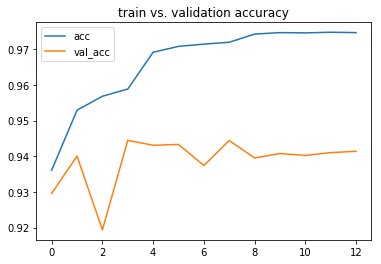

In [18]:
fh[['acc','val_acc']].plot(title = 'train vs. validation accuracy')

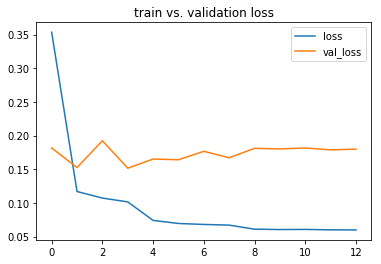

In [19]:
fh[['loss','val_loss']].plot(title = 'train vs. validation loss')

## confusion matrix

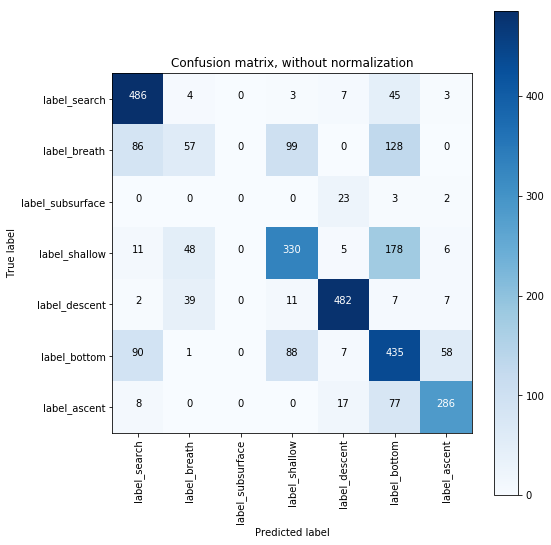

In [13]:
Image.open(path_model + 'confusion_matrix.png')

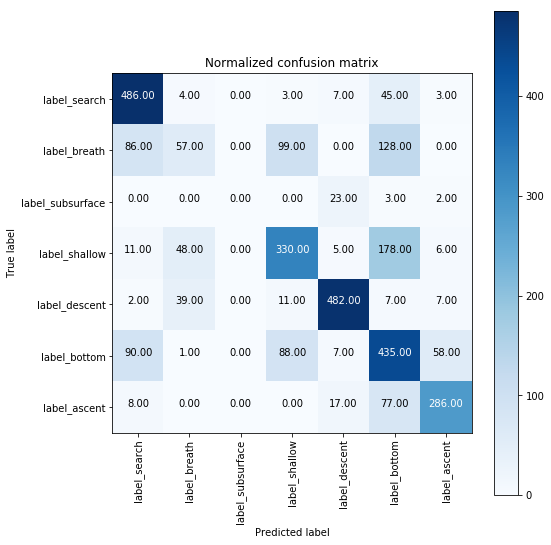

In [14]:
Image.open(path_model + 'confusion_matrix_normalized.png')